# Covid - 19 Analysis

## Through this Case Study, we will be going to answer 2 questions:-

###     Q1. Is there any relationship between the spread of Covid-19 in a country
###     Q2. How happy people are living in that country?

## Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [2]:
df = pd.read_csv("covid19_Confirmed_dataset.csv")
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [3]:
df.shape

(266, 104)

## Deleting irrelevant columns

In [4]:
df = df.drop(df[["Lat",'Long']], axis = 1)
df.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


## Aggregating the Rows by Countries

In [5]:
df = df.groupby("Country/Region").sum()
df.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [6]:
df.shape

(187, 100)

## Visualising Data related to Countries

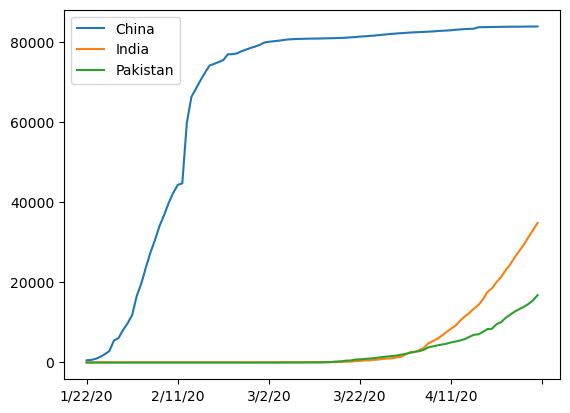

In [7]:
df.loc["China"].plot()
df.loc["India"].plot()
df.loc["Pakistan"].plot()
plt.legend()

## Calculating a Good Measure to describe the spread of Covid-19 in a country

<AxesSubplot:>

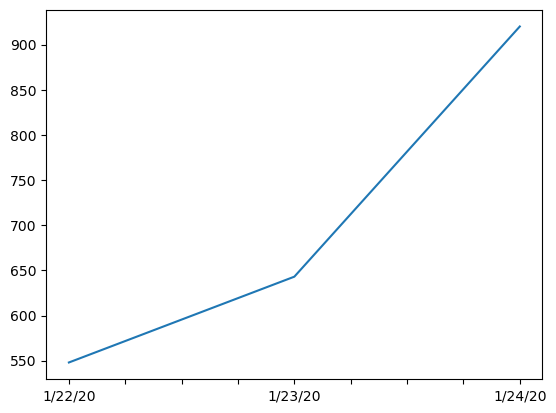

In [8]:
df.loc['China'][:3].plot()

 ## Calculating the first derivative of the curve

<AxesSubplot:>

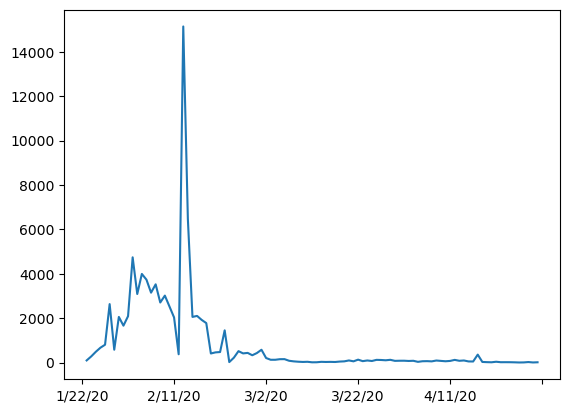

In [9]:
df.loc["China"].diff().plot()

## Finding the Maximum Infection Rate

In [10]:
df.loc["China"].diff().max()

15136.0

In [11]:
# Creating a list of MIR(Maximum Infection Rate) of all countries and storing it in the dataframe
countries = list(df.index)
mir = []

for c in countries:
    mir.append(df.loc[c].diff().max())
df["Maximum Infection Rate"] = mir

In [12]:
df.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,Maximum Infection Rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


## Creating a new dataframe without the Dates

In [13]:
df = pd.DataFrame(df["Maximum Infection Rate"])
df.head()

,Maximum Infection Rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


## Importing the Happiness Report Dataset

In [14]:
df2 = pd.read_csv("worldwide_happiness_report.csv")
df2.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


## Dropping the irrelevant columns

In [15]:
irr_col = ["Overall rank", "Score", "Generosity", "Perceptions of corruption"]
df2 = df2.drop(irr_col, axis = 1)
df2.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [16]:
df2 = df2.set_index("Country or region")
df2.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


## Joining the 2 datasets

In [17]:
df.shape

(187, 1)

In [18]:
df2.shape

(156, 4)

In [19]:
df3 = df.join(df2, how = "inner")
df3.head()

,Maximum Infection Rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


## Creating a Correlation Matrix to determine the correlation between factors

In [20]:
df3.corr()

,Maximum Infection Rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Maximum Infection Rate,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


## Visualization

<AxesSubplot:xlabel='GDP per capita', ylabel='Maximum Infection Rate'>

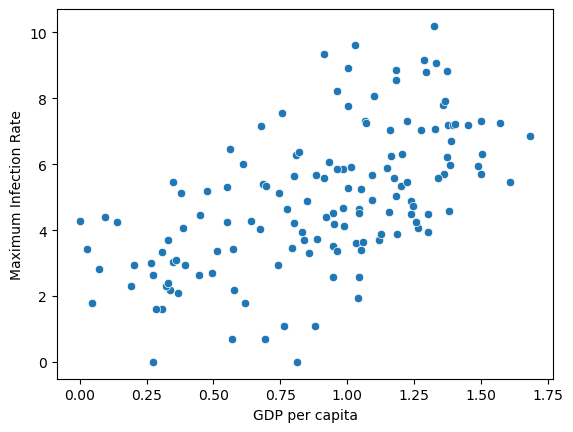

In [21]:
# GDP per Capita v/s Maximum Infection Rate
x = df3["GDP per capita"]
y = df3["Maximum Infection Rate"]
sns.scatterplot(x,np.log(y))

<AxesSubplot:xlabel='GDP per capita', ylabel='Maximum Infection Rate'>

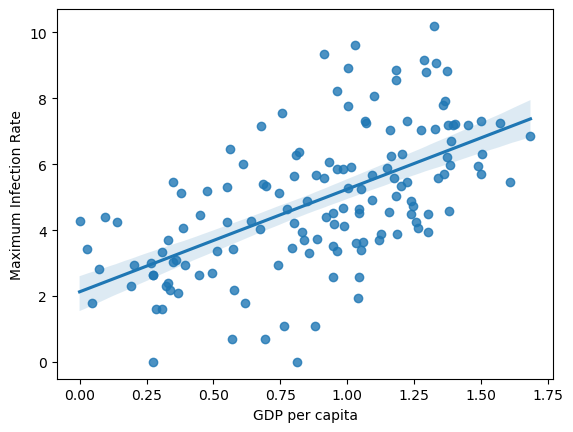

In [22]:
sns.regplot(x,np.log(y))

In [23]:
# Social Support v/s Maximum Infection Rate

x1 = df3["Social support"]
y1 = df3["Maximum Infection Rate"]i
sns.scatterplot(x1,np.log(y1))

SyntaxError: invalid syntax (1462734287.py, line 4)

In [ ]:
sns.regplot(x1,np.log(y1))

In [ ]:
# Healthy Life Expectancy v/s Maximum Infection Rate

x2 = df3["Healthy life expectancy"]
y2 = df3["Maximum Infection Rate"]
sns.scatterplot(x2,np.log(y2))

In [ ]:
sns.regplot(x2,np.log(y2))

In [ ]:
# Freedom to make life choices v/s Maximum Infection Rate

x3 = df3["Freedom to make life choices"]
y3 = df3["Maximum Infection Rate"]
sns.scatterplot(x3,np.log(y3))

In [ ]:
sns.regplot(x3,np.log(y3))